# Lecture 10: Naive Bayes

MTU Spring 2024

Instructor: Abel Reyes

### Announcements

- HW4 deadline is this Friday at 11:59pm.
- Quiz 2 this Friday (02/16), take home quiz
- HW5 will be released later today
- Guest speaker - next Monday (02/19/2024)
- Midterm exam - from next Wednesday (02/21/2024)
- Final project progress assignment will be released next Week, due to 03/08/24

## Naïve Bayes Classifier

### Is this SPAM email?

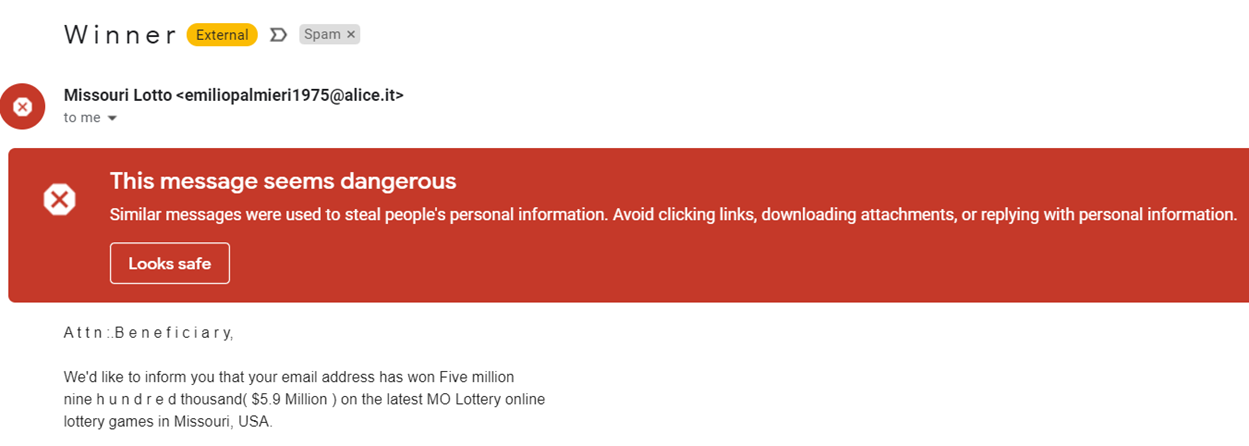

### Text Classification Using Naïve Bayes

### Text Classification
- Spam email detection
- Topic modelling 
- Authorship identification
- Age/gender identification
- Language identification 
- Sentiment analysis
- et al.,


## Spam or Ham emails?
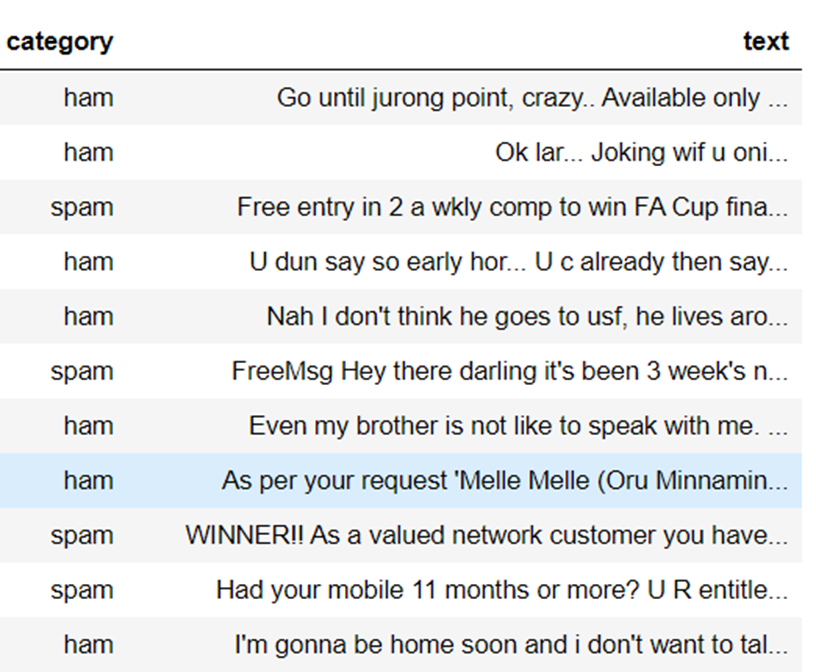

## Text Classification: definition

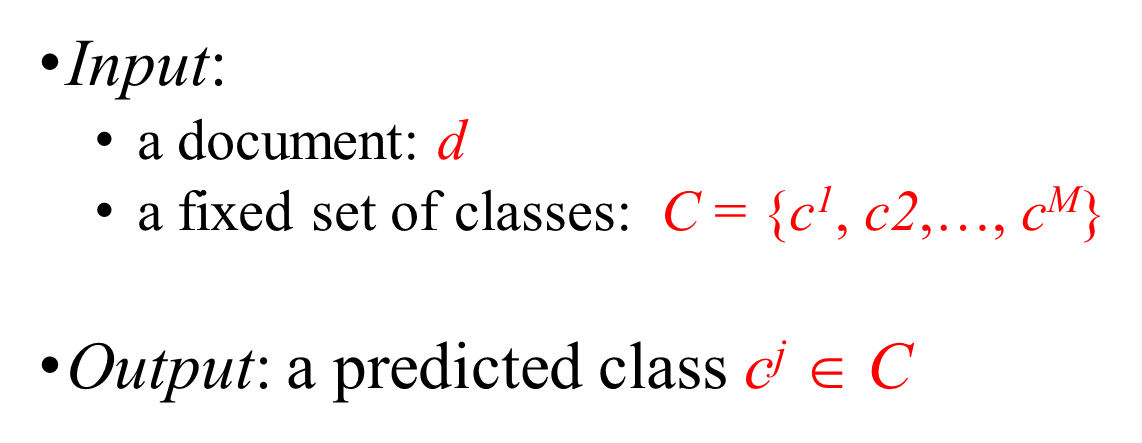

## Supervised Text Classification

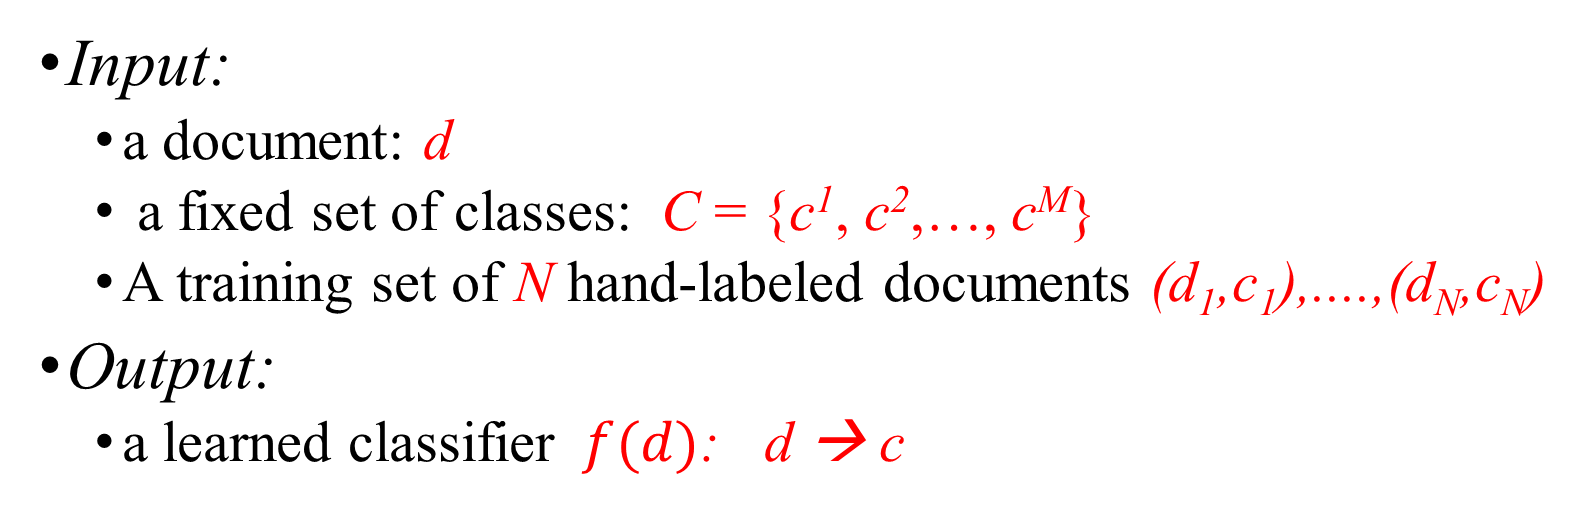

## ML Methods for text classification
Examples classifiers
 - Naïve Bayes
 - Logistic regression
 - Support-vector machines
 - Neural network
 - Division tress
 - k-nearest neighbor algorithm
 - …


## Naïve Bayes Intuition

A simple probabilistic classifier based on Bayes' theorem with strong (naïve): assume features are independence from each other.

Features presentation in text: **Bag of words**


## The Bag of Words Representation

An unordered set of words with their position ignored, and each word is paired with the number of its occurrence.

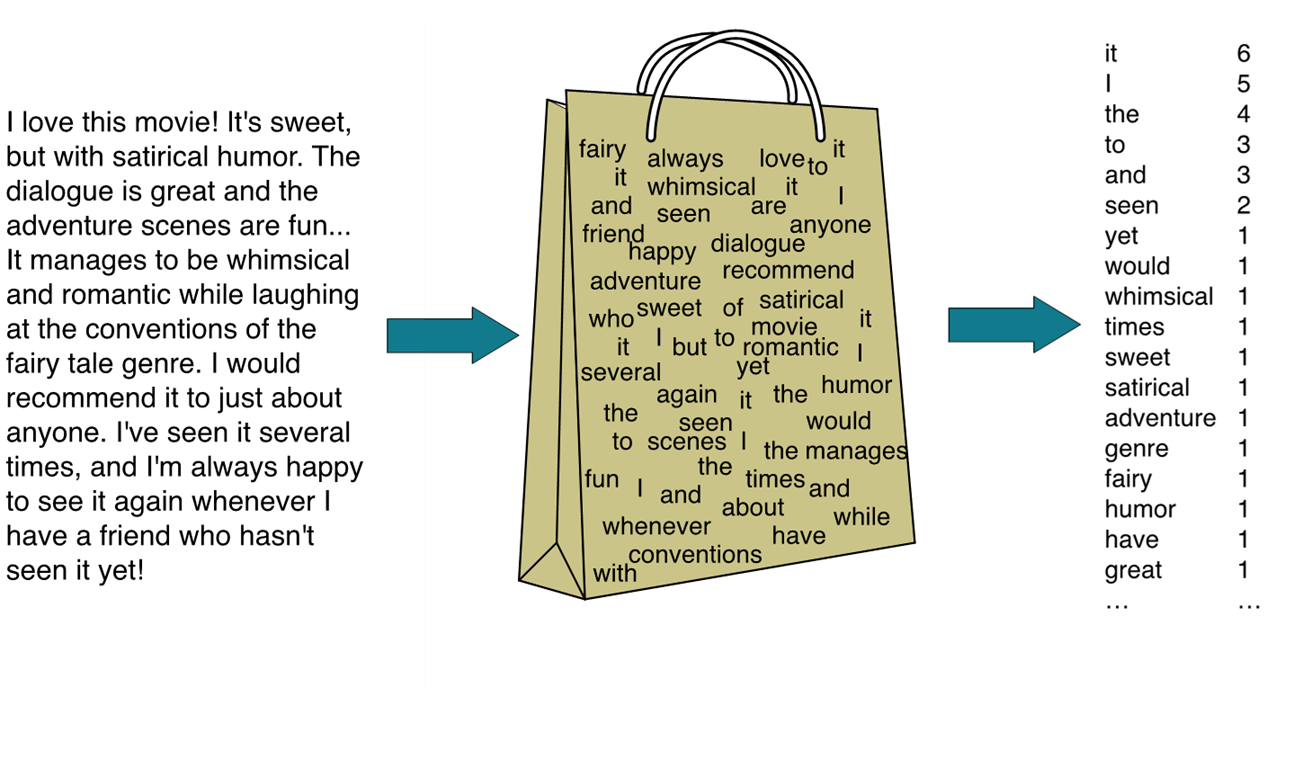

## Tech Terms!
### Tokenization
- split the text into individual words
### Stemming
- reduces related words to a common stem
- 'frightening', 'frightened', 'frightens‘ →  frighten
### Stop words
- Commonly used words such as ‘a’, ‘the’, ‘is’ which may not have contribution to NLP.
### Corpus: Collection of texts used to train an NLP model.
### Vocabulary: Collection of words used to train an NLP model.


## Coding Portion

### Step 1: Tokenization
- breaking down a text paragraph into smaller chunks such as words or sentence. 
- Token is a single entity that is building blocks for sentence or paragraph.


In [ ]:
#!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
#nltk.download('punkt')

In [ ]:
data="""Michigan Tech is a globally recognized technological university that educates students, advances knowledge, 
and innovates to improve the quality of life and to promote mutual respect and equity for all people within the state, 
the nation, and the global community. Create solutions for society’s challenges by delivering action-based undergraduate 
and graduate education, discovering new knowledge through research, and launching new technologies through innovation."""

In [ ]:
data

In [ ]:
tokenized_word=word_tokenize(data)
print(tokenized_word)

### Step 2: Remove Stop words
- Words does not add much meaning to a sentence, which can be ignored.


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
#nltk.download('stopwords')

In [ ]:
print(stopwords.words('english'))

In [ ]:
stop_words=stopwords.words('english')
filtered_sentence=[w for w in tokenized_word if not w.lower() in stop_words]
print(filtered_sentence)

In [ ]:
len(filtered_sentence), len(tokenized_word)

### Step 3: Stemming
- the process of producing morphological variants of a root/base word.

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
word_ps=[ps.stem(w) for w in filtered_sentence]
print(word_ps)

### Step 4: Build vocabulary and Word frequency calculation
- create a list of all of the words in our model vocabulary.
- vectorize our documents by counting how many times each word appears:


In [ ]:
vocal=sorted(set(word_ps))
vector=[]

for w in vocal:
    vector.append(word_ps.count(w))
print(vector)

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(vocal, vector)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the words on x-axis to make them readable
plt.title('Frequency of Each Word')
plt.show()

## BOW using scikit-learn
- Convert a collection of text documents to a matrix of token counts.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
data

In [ ]:
cv=CountVectorizer(stop_words='english', lowercase=True)
word_count=cv.fit_transform([data])

In [ ]:
print(cv.get_feature_names_out()) # Print all the words in vocabulary

In [ ]:
df_=pd.DataFrame(word_count.toarray(), columns=cv.get_feature_names_out())
df_#bag of words vectorized representation

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(cv.get_feature_names_out(), word_count.toarray()[0])

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the words on x-axis to make them readable
plt.title('Frequency of Each Word')
plt.show()

In [ ]:
word_count.toarray().shape

In [ ]:
word_count.toarray().shape

## Multinomial Naive Bayes in Scikit-learn

- Naive Bayes classifier for multinomial models.
- The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.


In [ ]:
import numpy as np
rng=np.random.RandomState(1)
X=rng.randint(5, size=(6,100))
y=np.array([1,2,3,4,5,6])

X, y

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB(force_alpha=True)
clf.fit(X,y)

## SPAM/HAM email classifier

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
spam_df=pd.read_csv('data/emails.csv')
spam_df

In [ ]:
spam_df.tail(10)


In [ ]:
spam_df.describe()


In [ ]:
spam_df.info()


## Visualize the Data


In [ ]:
ham=spam_df[spam_df['spam']==0]


In [ ]:
spam=spam_df[spam_df['spam']==1]


In [ ]:
ham


In [ ]:
spam


In [ ]:
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')


In [ ]:
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')


In [ ]:
sns.countplot(spam_df, x="spam", 
              hue='spam',
              legend=False,
              label='Spam vs Ham')


## Applying CountVectorizer to our Spam Ham Example


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer=CountVectorizer(stop_words='english', lowercase=True)
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [ ]:
print(vectorizer.get_feature_names_out())


In [ ]:
vectorizer.get_feature_names_out()[0:5000]

## Dividing the Cell for Training and Testing Prior to Training


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [ ]:
X.shape


In [ ]:
y.shape


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
NB_classifier=MultinomialNB(force_alpha=True)
NB_classifier.fit(X_train,y_train)

## Evaluating The Model


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

In [ ]:
cm=confusion_matrix(y_train,y_predict_train)


In [ ]:
sns.heatmap(cm,annot=True, fmt="g")
plt.xlabel('Predicted labels')  # X-axis label
plt.ylabel('True labels')       # Y-axis label

# Optional: Adding titles or adjusting further
plt.title('Confusion Matrix')   # Add a title to the heatmap

plt.show()

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

In [ ]:
cm=confusion_matrix(y_test,y_predict_test)


In [ ]:
sns.heatmap(cm,annot=True, fmt="g")
plt.xlabel('Predicted labels')  # X-axis label
plt.ylabel('True labels')       # Y-axis label

# Optional: Adding titles or adjusting further
plt.title('Confusion Matrix')   # Add a title to the heatmap

plt.show()

In [ ]:
print(classification_report(y_test,y_predict_test))


### Summary
- It is probabilistic classification methods that are able to quantity uncertainty in predictions by providing posterior probability
- Efficient and simple, not hyperparameter tuning stages 
- Effective in solving a multiclass problem
- Work well with few samples for training
- Robust to independent attributes
- It performs well in case of text analytics problems
- Handle missing values by ignoring the instance during probability estimate calculations. 
    - e.g., use only the non-missing values in a test instance while computing posterior probabilities.


### Disadvatange
- Redundant and correlated attributes will violate class conditional assumption
   - Alternative approach: Bayesian Belief Networks (BBN)
- Not ideal for data sets with a large number of numerical attributes
